In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [ ]:
df = pd.read_csv("forms_data.csv")

In [3]:
df.head()

,UserId,CompanyId,UserType,BreezeUser,IsDeleted,CreatedOn,State,PrimeTransactions,PrimeListings,LibrariesAdded,...,FilesCreated,FirstFileCreated,FormsAdded,FirstFormAdded,EnvelopesSent,FirstEnvelopeSent,EnvelopesCompleted,FirstEnvelopeCompleted,EnvelopesSentLastMonth,EnvelopesSentPriorMonth
0,3992157255,3.024353e+09,Agent,0,0,2021-05-08 2:19:25,TX,25,5,1.0,...,1,2021-05-08 2:21:17,0,NaN,0,NaN,0,NaN,0,0
1,1046555750,9.573933e+07,Auditor,0,0,2021-05-14 20:29:20,MI,0,0,1.0,...,0,NaN,0,NaN,0,NaN,0,NaN,0,0
2,3451135525,NaN,NaN,0,0,2021-08-03 16:24:21,CA,0,0,NaN,...,0,NaN,0,NaN,0,NaN,0,NaN,0,0
3,3170382534,1.543305e+09,Agent,0,0,2021-07-07 18:54:21,CA,4,1,1.0,...,1,2021-07-07 18:59:25,1,2021-07-07 18:59:42,0,NaN,0,NaN,0,0
4,120154270,4.491867e+08,Agent,0,0,2022-10-01 22:06:39,CA,2,0,NaN,...,0,NaN,0,NaN,0,NaN,0,NaN,0,0


In [4]:
df.shape

(76842, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76842 entries, 0 to 76841
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UserId                   76842 non-null  int64  
 1   CompanyId                60051 non-null  float64
 2   UserType                 59398 non-null  object 
 3   BreezeUser               76842 non-null  int64  
 4   IsDeleted                76842 non-null  int64  
 5   CreatedOn                76842 non-null  object 
 6   State                    76842 non-null  object 
 7   PrimeTransactions        76842 non-null  int64  
 8   PrimeListings            76842 non-null  int64  
 9   LibrariesAdded           40314 non-null  float64
 10  LibraryNames             40314 non-null  object 
 11  FilesCreated             76842 non-null  int64  
 12  FirstFileCreated         31848 non-null  object 
 13  FormsAdded               76842 non-null  int64  
 14  FirstFormAdded        

In [6]:
df.describe()

,UserId,CompanyId,BreezeUser,IsDeleted,PrimeTransactions,PrimeListings,LibrariesAdded,FilesCreated,FormsAdded,EnvelopesSent,EnvelopesCompleted,EnvelopesSentLastMonth,EnvelopesSentPriorMonth
count,7.684200e+04,6.005100e+04,76842.000000,76842.000000,76842.000000,76842.000000,40314.000000,76842.000000,76842.000000,76842.000000,76842.000000,76842.000000,76842.000000
mean,2.140734e+09,2.714145e+09,0.028721,0.064014,8.032274,4.059499,1.835715,4.032743,52.818901,11.496616,10.116317,0.572369,0.630671
std,1.239147e+09,1.261042e+09,0.167023,0.244780,21.034110,11.531613,1.640039,13.669874,211.617114,46.298803,41.659512,3.101666,3.346370
min,3.014700e+04,2.063067e+06,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.072132e+09,1.651909e+09,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.132875e+09,3.463081e+09,0.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.213369e+09,3.463081e+09,0.000000,0.000000,9.000000,4.000000,2.000000,2.000000,11.000000,1.000000,0.000000,0.000000,0.000000
max,4.294904e+09,4.291945e+09,1.000000,1.000000,1582.000000,581.000000,33.000000,766.000000,8736.000000,1631.000000,1505.000000,130.000000,123.000000


In [7]:
df.isnull().sum()

UserId                         0
CompanyId                  16791
UserType                   17444
BreezeUser                     0
IsDeleted                      0
CreatedOn                      0
State                          0
PrimeTransactions              0
PrimeListings                  0
LibrariesAdded             36528
LibraryNames               36528
FilesCreated                   0
FirstFileCreated           44994
FormsAdded                     0
FirstFormAdded             48327
EnvelopesSent                  0
FirstEnvelopeSent          57363
EnvelopesCompleted             0
FirstEnvelopeCompleted     58637
EnvelopesSentLastMonth         0
EnvelopesSentPriorMonth        0
dtype: int64

In [8]:
df['CompanyId'] = df['CompanyId'].fillna(0)

In [9]:
df['UserType'].unique()

array(['Agent', 'Auditor', nan, 'Limited TC', 'Broker'], dtype=object)

In [10]:
df['UserType'] = df['UserType'].fillna('Not Specified')
df['CompanyId'] = df['CompanyId'].fillna(0)
df['LibrariesAdded'] = df['LibrariesAdded'].fillna(0)
df['LibraryNames'] = df['LibraryNames'].fillna("")

In [11]:
df.isnull().sum()

UserId                         0
CompanyId                      0
UserType                       0
BreezeUser                     0
IsDeleted                      0
CreatedOn                      0
State                          0
PrimeTransactions              0
PrimeListings                  0
LibrariesAdded                 0
LibraryNames                   0
FilesCreated                   0
FirstFileCreated           44994
FormsAdded                     0
FirstFormAdded             48327
EnvelopesSent                  0
FirstEnvelopeSent          57363
EnvelopesCompleted             0
FirstEnvelopeCompleted     58637
EnvelopesSentLastMonth         0
EnvelopesSentPriorMonth        0
dtype: int64

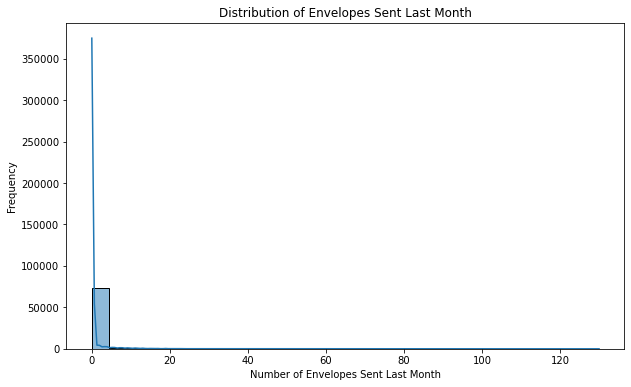

In [12]:
# Histogram for EnvelopesSentLastMonth
plt.figure(figsize=(10,6))
sns.histplot(df['EnvelopesSentLastMonth'], bins=30, kde=True)
plt.title('Distribution of Envelopes Sent Last Month')
plt.xlabel('Number of Envelopes Sent Last Month')
plt.ylabel('Frequency')
plt.show()

In [13]:
df['EnvelopesSentLastMonth'].describe()

count    76842.000000
mean         0.572369
std          3.101666
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        130.000000
Name: EnvelopesSentLastMonth, dtype: float64

In [14]:
df['EnvelopesSentLastMonth'].nlargest(n=5)

69205    130
51364    127
25644    122
44194     92
18378     83
Name: EnvelopesSentLastMonth, dtype: int64

In [15]:
df.loc[df['EnvelopesSentLastMonth'] == 130]

,UserId,CompanyId,UserType,BreezeUser,IsDeleted,CreatedOn,State,PrimeTransactions,PrimeListings,LibrariesAdded,...,FilesCreated,FirstFileCreated,FormsAdded,FirstFormAdded,EnvelopesSent,FirstEnvelopeSent,EnvelopesCompleted,FirstEnvelopeCompleted,EnvelopesSentLastMonth,EnvelopesSentPriorMonth
69205,3859453467,3.463081e+09,Agent,0,0,2021-10-18 18:02:48,AZ,467,282,2.0,...,211,2021-10-18 19:54:34,1943,2021-10-18 19:56:11,1055,2021-10-18 23:50:35,948,2021-10-18 23:50:35,130,80


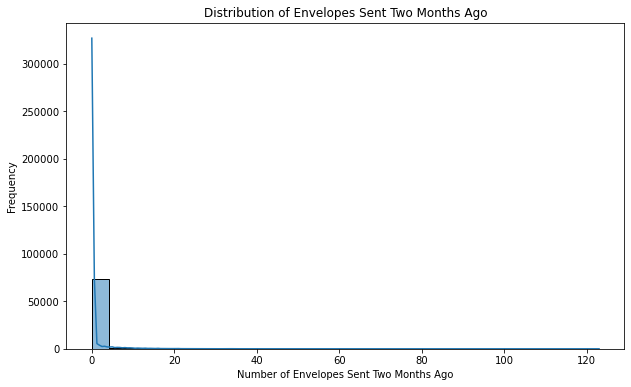

In [16]:
# Histogram for EnvelopesSentPriorMonth
plt.figure(figsize=(10,6))
sns.histplot(df['EnvelopesSentPriorMonth'], bins=30, kde=True)
plt.title('Distribution of Envelopes Sent Two Months Ago')
plt.xlabel('Number of Envelopes Sent Two Months Ago')
plt.ylabel('Frequency')
plt.show()

In [17]:
df['EnvelopesSentPriorMonth'].max()

123

In [18]:
df['EnvelopesSentPriorMonth'].describe()

count    76842.000000
mean         0.630671
std          3.346370
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        123.000000
Name: EnvelopesSentPriorMonth, dtype: float64

In [19]:
df['EnvelopesSentPriorMonth'].nlargest(n=10)

51364    123
44194    102
18378     96
25911     92
58199     89
70301     87
27669     81
69205     80
61573     76
28715     75
Name: EnvelopesSentPriorMonth, dtype: int64

In [20]:
df.loc[df['EnvelopesSentPriorMonth'] == 123]

,UserId,CompanyId,UserType,BreezeUser,IsDeleted,CreatedOn,State,PrimeTransactions,PrimeListings,LibrariesAdded,...,FilesCreated,FirstFileCreated,FormsAdded,FirstFormAdded,EnvelopesSent,FirstEnvelopeSent,EnvelopesCompleted,FirstEnvelopeCompleted,EnvelopesSentLastMonth,EnvelopesSentPriorMonth
51364,1293540428,3.463081e+09,Agent,1,0,2021-07-04 22:16:35,OR,354,223,2.0,...,137,2022-07-15 21:23:31,2194,2022-07-07 3:22:21,317,2022-07-26 19:29:26,284,2022-07-26 19:29:26,127,123


In [21]:
# turning state data into list
df['State'] = df['State'].str.split(',')
df_exploded = df.explode('State').reset_index(drop=True)

In [22]:
states_split = df['State'].str.get_dummies(sep=',')
df = pd.concat([df, states_split], axis=1)

In [23]:
df['Number_of_States'] = df['State'].apply(len)

In [24]:
df.head()

,UserId,CompanyId,UserType,BreezeUser,IsDeleted,CreatedOn,State,PrimeTransactions,PrimeListings,LibrariesAdded,...,['UT'],['VA',['VA'],['VT'],['WA',['WA'],['WI'],['WV'],['WY'],Number_of_States
0,3992157255,3.024353e+09,Agent,0,0,2021-05-08 2:19:25,[TX],25,5,1.0,...,0,0,0,0,0,0,0,0,0,1
1,1046555750,9.573933e+07,Auditor,0,0,2021-05-14 20:29:20,[MI],0,0,1.0,...,0,0,0,0,0,0,0,0,0,1
2,3451135525,0.000000e+00,Not Specified,0,0,2021-08-03 16:24:21,[CA],0,0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,3170382534,1.543305e+09,Agent,0,0,2021-07-07 18:54:21,[CA],4,1,1.0,...,0,0,0,0,0,0,0,0,0,1
4,120154270,4.491867e+08,Agent,0,0,2022-10-01 22:06:39,[CA],2,0,0.0,...,0,0,0,0,0,0,0,0,0,1


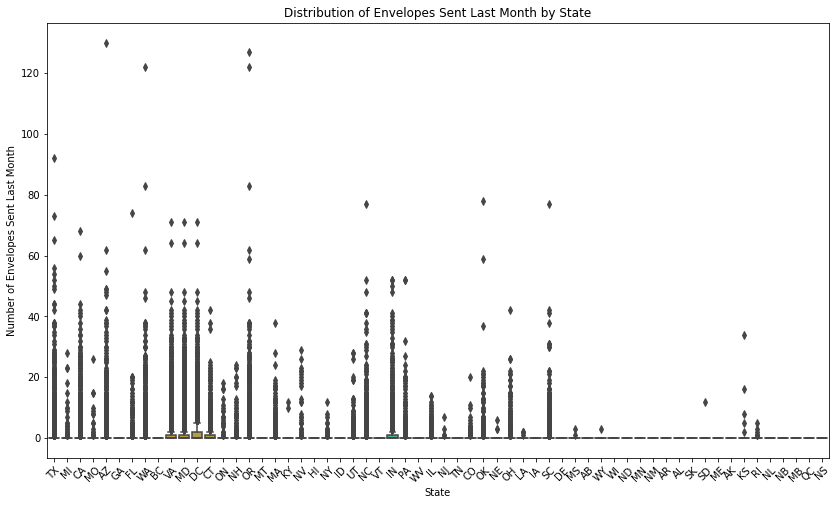

In [25]:
plt.figure(figsize=(14,8))
sns.boxplot(x='State', y='EnvelopesSentLastMonth', data=df_exploded)
plt.title('Distribution of Envelopes Sent Last Month by State')
plt.xlabel('State')
plt.ylabel('Number of Envelopes Sent Last Month')
plt.xticks(rotation=45)
plt.show()

## Build a Model to Determine Variables Impacting Habit Formation
habit formation is sending 3 or more envelopes in each of the last 2 months<br>
binary column Habit_Formed where:<br>
1 indicates habit formed (if both EnvelopesSentLastMonth and EnvelopesSentPriorMonth are >= 3)<br>
0 indicates no habit formed

In [26]:
df_exploded.head()

,UserId,CompanyId,UserType,BreezeUser,IsDeleted,CreatedOn,State,PrimeTransactions,PrimeListings,LibrariesAdded,...,FilesCreated,FirstFileCreated,FormsAdded,FirstFormAdded,EnvelopesSent,FirstEnvelopeSent,EnvelopesCompleted,FirstEnvelopeCompleted,EnvelopesSentLastMonth,EnvelopesSentPriorMonth
0,3992157255,3.024353e+09,Agent,0,0,2021-05-08 2:19:25,TX,25,5,1.0,...,1,2021-05-08 2:21:17,0,NaN,0,NaN,0,NaN,0,0
1,1046555750,9.573933e+07,Auditor,0,0,2021-05-14 20:29:20,MI,0,0,1.0,...,0,NaN,0,NaN,0,NaN,0,NaN,0,0
2,3451135525,0.000000e+00,Not Specified,0,0,2021-08-03 16:24:21,CA,0,0,0.0,...,0,NaN,0,NaN,0,NaN,0,NaN,0,0
3,3170382534,1.543305e+09,Agent,0,0,2021-07-07 18:54:21,CA,4,1,1.0,...,1,2021-07-07 18:59:25,1,2021-07-07 18:59:42,0,NaN,0,NaN,0,0
4,120154270,4.491867e+08,Agent,0,0,2022-10-01 22:06:39,CA,2,0,0.0,...,0,NaN,0,NaN,0,NaN,0,NaN,0,0


In [27]:
df_exploded['Habit_Formed'] = (df_exploded['EnvelopesSentLastMonth'] >= 3) & (df_exploded['EnvelopesSentPriorMonth'] >= 3)
df_exploded['Habit_Formed'] = df_exploded['Habit_Formed'].astype(int)

Potential predictors:

- UserType<br>
- BreezeUser<br>
- DTMTransactions<br>
- DTMListings<br>
- LibrariesAdded<br>
- FilesCreated<br>
- FormsAdded<br>
- State (after it's exploded)<br>

In [29]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse=False)

# One-hot encoding UserType and State columns
encoded_features = encoder.fit_transform(df_exploded[['UserType', 'State']])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['UserType', 'State']))

# Concatenate original dataframe with encoded dataframe
df_encoded = pd.concat([df_exploded.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

C:\Users\Kyle\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Features and Target
features = ['BreezeUser', 'PrimeTransactions', 'PrimeListings', 'LibrariesAdded', 'FilesCreated', 'FormsAdded'] + list(encoded_df.columns)
X = df_encoded[features]
y = df_encoded['Habit_Formed']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and fit the model
logreg = LogisticRegression(max_iter=1000)  # max_iter increased for convergence
logreg.fit(X_train, y_train)

# Predict and evaluate
y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     24981
           1       0.71      0.39      0.50      1346

    accuracy                           0.96     26327
   macro avg       0.84      0.69      0.74     26327
weighted avg       0.95      0.96      0.95     26327



C:\Users\Kyle\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
coefficients = pd.DataFrame({'Feature': features, 'Coefficient': logreg.coef_[0]})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)
pd.options.display.max_seq_items = 2000
print(coefficients)

                   Feature  Coefficient
57                State_SC     1.358299
26                State_IN     1.322937
40                State_NC     1.311859
50                State_OH     1.110892
17                State_CT     1.109415
..                     ...          ...
44                State_NJ    -1.411467
52                State_ON    -1.519118
7          UserType_Broker    -1.593167
49                State_NY    -1.769167
9   UserType_Not Specified    -2.291069

[69 rows x 2 columns]


In [34]:
coefficients.to_csv('coeff_forms_output.csv')

In [35]:
# adjusting for imbalance of adopted users

In [36]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [37]:
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Fit SMOTE on training data
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Verify the balance
print(y_resampled.value_counts())

0    58299
1    58299
Name: Habit_Formed, dtype: int64


In [38]:
# Initialize and fit the model on resampled data
logreg_resampled = LogisticRegression(max_iter=1000)
logreg_resampled.fit(X_resampled, y_resampled)

# Predict and evaluate
y_pred_resampled = logreg_resampled.predict(X_test)
print(classification_report(y_test, y_pred_resampled))

              precision    recall  f1-score   support

           0       0.99      0.92      0.95     24981
           1       0.36      0.87      0.51      1346

    accuracy                           0.91     26327
   macro avg       0.67      0.89      0.73     26327
weighted avg       0.96      0.91      0.93     26327



C:\Users\Kyle\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ROC-AUC Score: 0.963551214227419


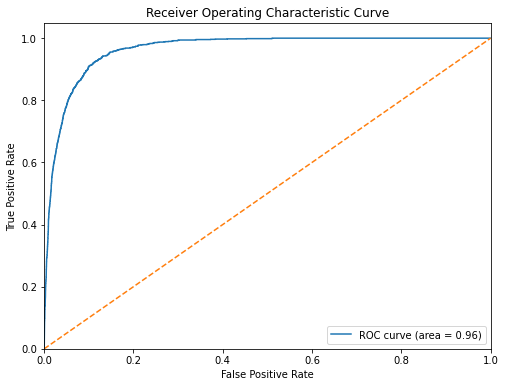

In [39]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Get the probability of Class 1
y_prob_resampled = logreg_resampled.predict_proba(X_test)[:,1]

# ROC-AUC score
auc_score = roc_auc_score(y_test, y_prob_resampled)
print(f"ROC-AUC Score: {auc_score}")

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_resampled)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()